#### Explore DataSet

Columns | Definition
---|---------
`age` | Age of Persons
`workclass` | Describe work type 
`fnlwgt` | Financial Weight
`education` | Person's education level
`martial status` | Person's martial status
`occupation` | Person's usual or principal work or business
`sex` | Gender of Person
`race` | Person's race
`capital gain` | Person's capital gain
`capital loss` | Person's capital loss
`hours per hour` | Earn per hour
`native country` | Persons native country
`income` | Whether <50k or not

*The goal is to accurately predict whether or not someone is making more or less than $50,000 a year.*,

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pandas_profiling
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import *
warnings.filterwarnings("ignore")
%matplotlib inline

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11604/3115176391.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
# Import data
df = pd.read_csv("income.csv")

# EDA

In [3]:
df.head(5)

age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-States   <=50K  
1              0              0               13   United-States   <=50K  
2              0              0               40   United-States   <=50K  
3              0              0               40   United-States   <=50K  
4              0              0               40            Cuba   <=50K

In [4]:
# Let's explore data 
profiling = pandas_profiling.ProfileReport(df)
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

### There is a little space in column names

In [6]:
df.columns = [col.replace(' ','') for col in df.columns]

### Almost every value has space in it. So lets fix it

In [7]:
df['income'] = [value.replace(' ','') for value in df['income']]

##### We have a problem here. Our result column has sampling

<AxesSubplot:xlabel='income', ylabel='count'>

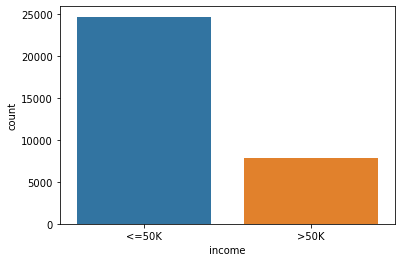

In [8]:
sns.countplot(data = df, x = 'income')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

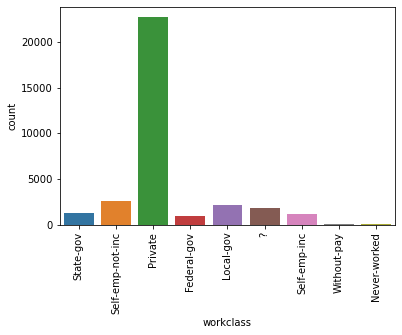

In [9]:
df['workclass'] = [value.replace(' ','')  for value in df['workclass']]
sns.countplot(data = df, x = 'workclass')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

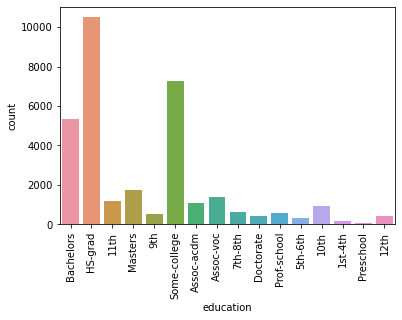

In [10]:
df['education'] = [value.replace(' ','')  for value in df['education']]
sns.countplot(data = df, x = 'education')
plt.xticks(rotation = 90)

In [11]:
#Due to the relatively low occurrence of certain values in this column, I plan to replace them all with a single common value.
replace_dict = {
    '12th':'secondary school students',
    '11th':'secondary school students',
    '10th':'secondary school students',
    '9th':'secondary school students',
    '7th-8th':'secondary school students',
    '5th-6th':'secondary school students',
    '1st-4th':'secondary school students',
    'Preschool':'others',
    'Assoc-voc':'others',
    'Assoc-acdm':'others',
    'Prof-school':'others',
    'Doctorate':'others'
}

df['education'] = df['education'].replace(replace_dict)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, 'secondary school students'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'Some-college'),
  Text(5, 0, 'others')])

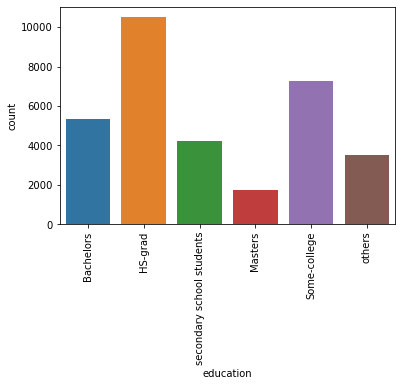

In [12]:
sns.countplot(data = df, x = 'education')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Married-spouse-absent'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-AF-spouse'),
  Text(6, 0, 'Widowed')])

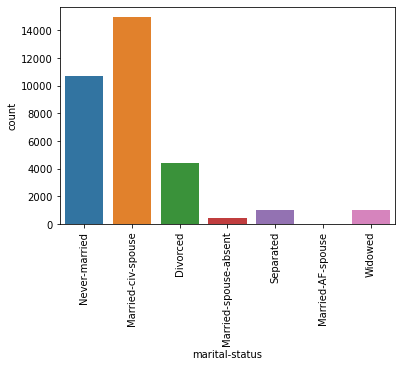

In [13]:
df["marital-status"] = [cols.replace(' ', '') for cols in df["marital-status"]]
sns.countplot(data=df,x='marital-status')
plt.xticks(rotation=90)

In [14]:
replace_dict = {
    'Separated':'others',
    'Widowed':'others',
    'Married-spouse-absent':'others',
    'Married-AF-spouse':'others'
}

df["marital-status"] = df["marital-status"].replace(replace_dict)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'others')])

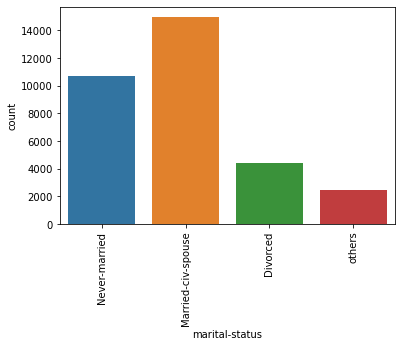

In [15]:
sns.countplot(data=df,x='marital-status')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'Jamaica'),
  Text(3, 0, 'India'),
  Text(4, 0, '?'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'South'),
  Text(7, 0, 'Puerto-Rico'),
  Text(8, 0, 'Honduras'),
  Text(9, 0, 'England'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Iran'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'Italy'),
  Text(15, 0, 'Poland'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Cambodia'),
  Text(18, 0, 'Thailand'),
  Text(19, 0, 'Ecuador'),
  Text(20, 0, 'Laos'),
  Text(21, 0, 'Taiwan'),
  Text(22, 0, 'Haiti'),
  Text(23, 0, 'Portugal'),
  Text(24, 0, 'Dominican-Republic'),
  Text(25, 0, 'El-Salvador'),
  Text(26, 0, 'France'),
  Text(27, 0, 'Guatemala'),
  Text(28, 0, 'China'),
  Text(29, 0, 'Japan'),
  Text(30, 0, 'Yugoslavia'),
  T

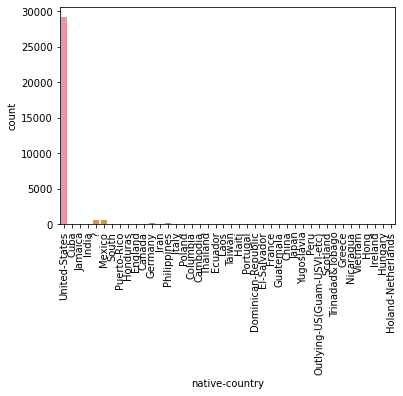

In [16]:
df["native-country"] = [cols.replace(' ', '') for cols in df["native-country"]]
sns.countplot(data=df,x='native-country')
plt.xticks(rotation=90)

In [17]:
values = [value for value in df['native-country'].unique() if value != 'United-States' and value != '?']
#df.loc[df['native-country'].isin(values), df['native-country']] = 'others'
new_value = 'others'
df['native-country'] = df['native-country'].replace(values,new_value)


(array([0, 1, 2]),
 [Text(0, 0, 'United-States'), Text(1, 0, 'others'), Text(2, 0, '?')])

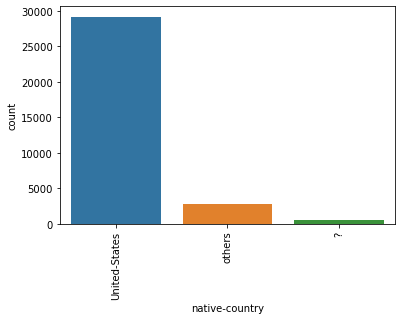

In [18]:
sns.countplot(data=df,x='native-country')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, '?'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

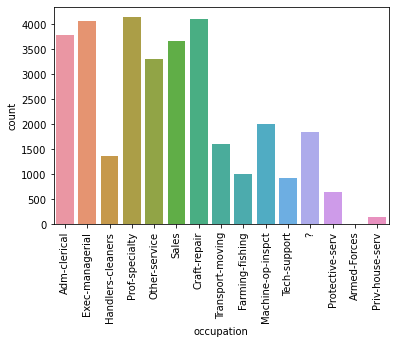

In [19]:
df["occupation"] = [cols.replace(' ', '') for cols in df["occupation"]]
sns.countplot(data=df,x='occupation')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Wife'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

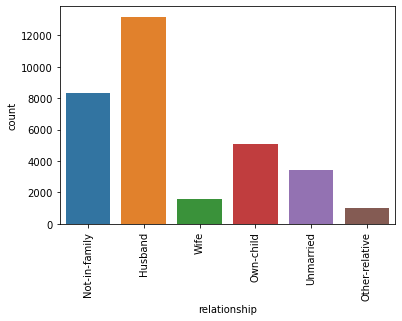

In [20]:
df["relationship"] = [cols.replace(' ', '') for cols in df["relationship"]]
sns.countplot(data=df,x='relationship')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

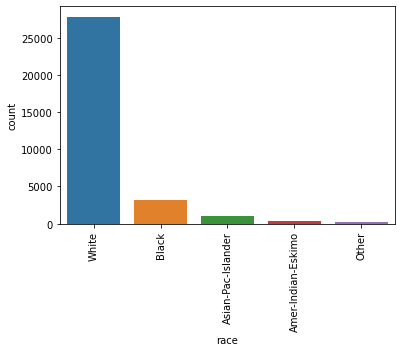

In [21]:
df["race"] = [cols.replace(' ', '') for cols in df["race"]]
sns.countplot(data=df,x='race')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

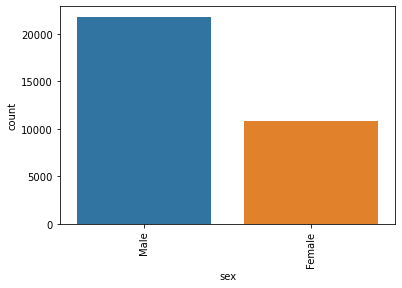

In [22]:
df["sex"] = [cols.replace(' ', '') for cols in df["sex"]]
sns.countplot(data=df,x='sex')
plt.xticks(rotation=90)

### In some columns there are a missing value as "?" but we should convert actual None .

In [23]:
df = df.replace('?',np.nan)

In [24]:
def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns = {'index':'columns', 0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values
    

In [25]:
about_data(df)

columns  total missing  ration of missing
0              age              0           0.000000
1        workclass           1836           0.056386
2           fnlwgt              0           0.000000
3        education              0           0.000000
4    education-num              0           0.000000
5   marital-status              0           0.000000
6       occupation           1843           0.056601
7     relationship              0           0.000000
8             race              0           0.000000
9              sex              0           0.000000
10    capital-gain              0           0.000000
11    capital-loss              0           0.000000
12  hours-per-week              0           0.000000
13  native-country            583           0.017905
14          income              0           0.000000

### There are 3 columns have null value. we can drop it because of percentage of missing value very low. 

In [26]:
df.dropna(axis = 0, inplace = True)
about_data(df)

columns  total missing  ration of missing
0              age              0                0.0
1        workclass              0                0.0
2           fnlwgt              0                0.0
3        education              0                0.0
4    education-num              0                0.0
5   marital-status              0                0.0
6       occupation              0                0.0
7     relationship              0                0.0
8             race              0                0.0
9              sex              0                0.0
10    capital-gain              0                0.0
11    capital-loss              0                0.0
12  hours-per-week              0                0.0
13  native-country              0                0.0
14          income              0                0.0

# Visualization

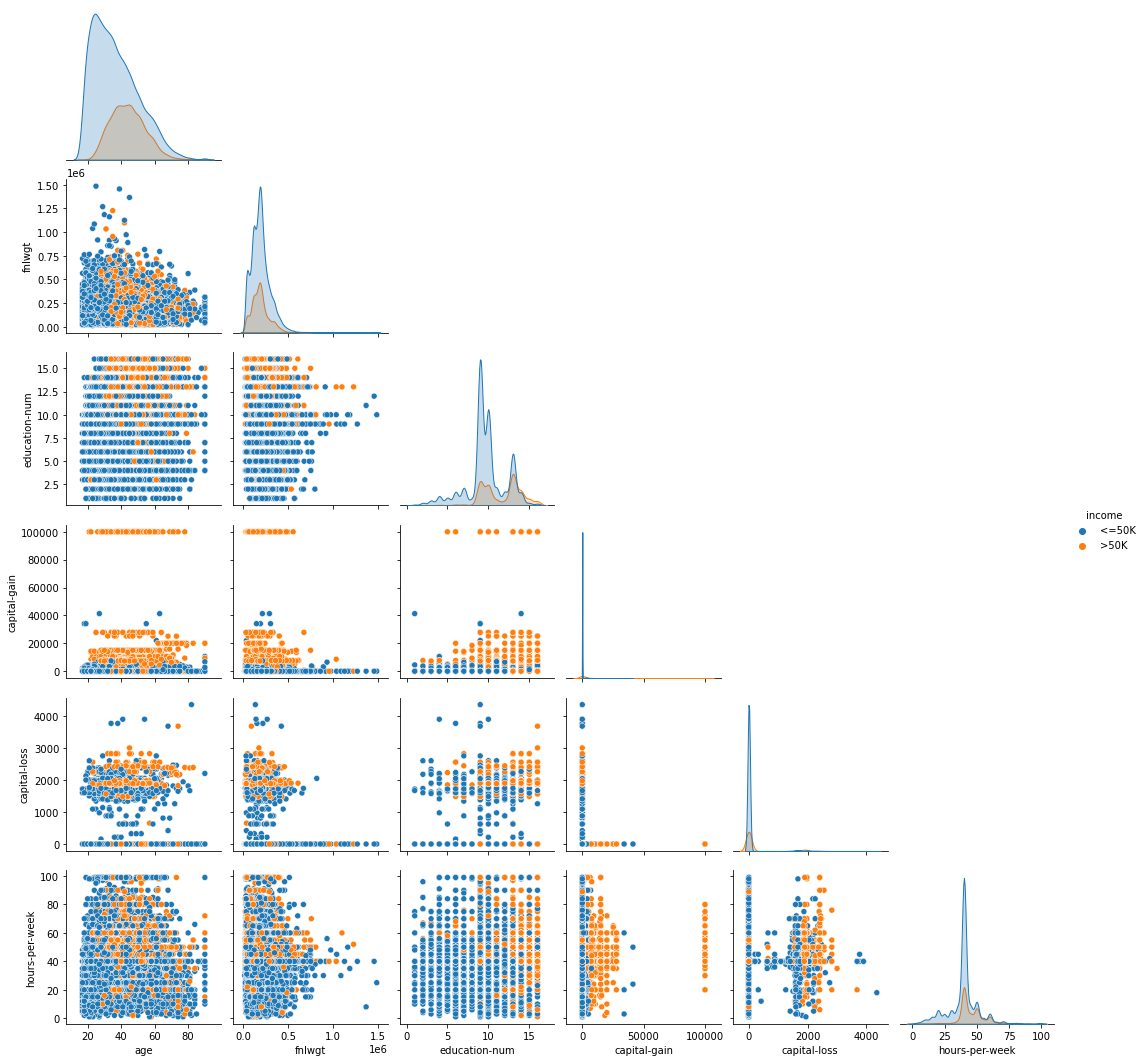

In [27]:
sns.pairplot(data = df, hue = 'income', corner = True)

<AxesSubplot:>

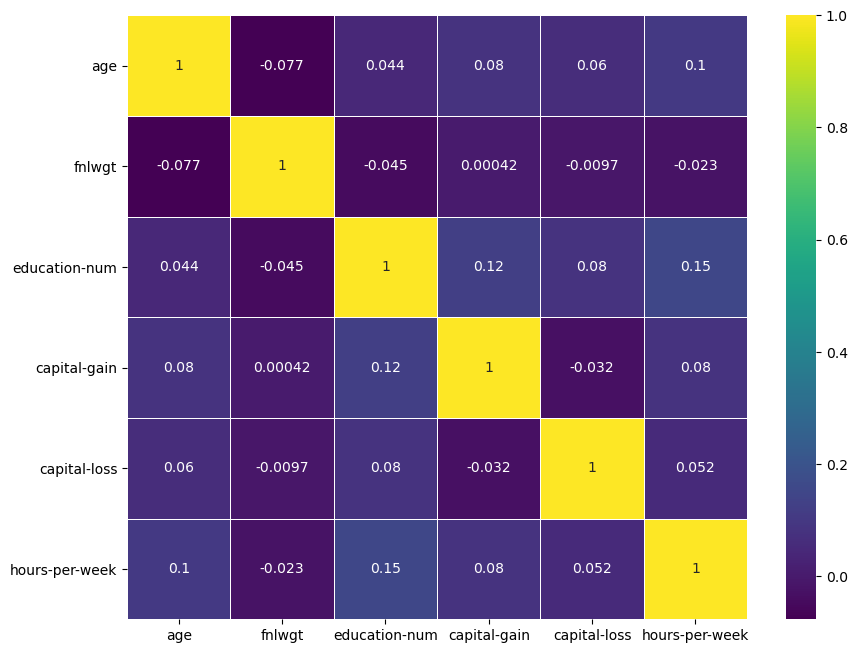

In [28]:
cols = [col for col in df.columns if df[col].dtype == 'int64']
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df[cols].corr(),cmap="viridis",annot=True,linewidth=0.5)

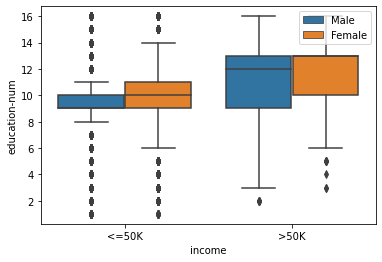

In [29]:
sns.boxplot(data = df, x = 'income', y = 'education-num', hue = 'sex')
plt.legend(loc = 'upper right')

In [30]:
def hist(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

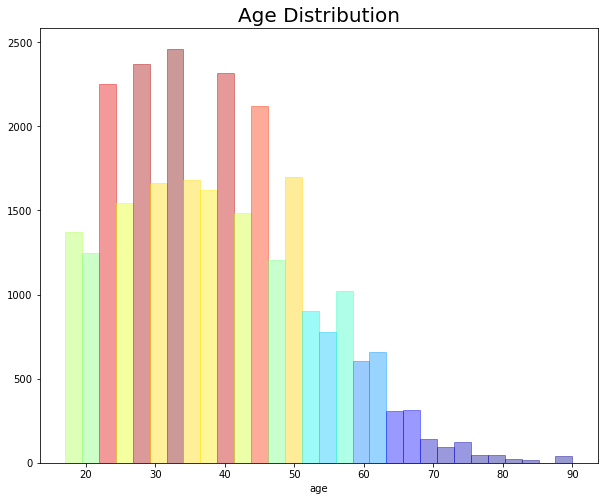

In [31]:
hist(df.age, "Age Distribution")

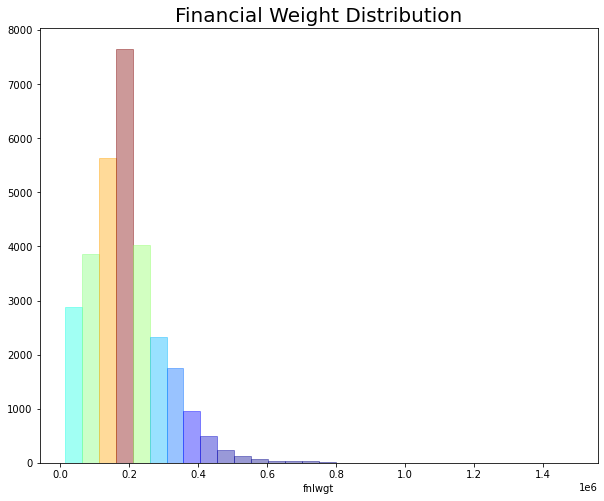

In [32]:
hist(df.fnlwgt,"Financial Weight Distribution")

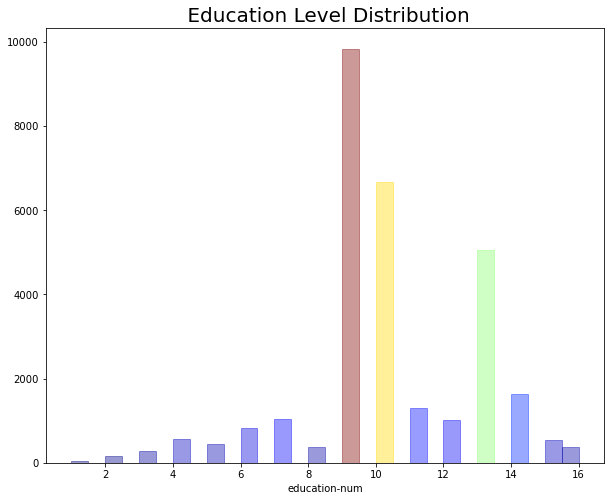

In [33]:
hist(df['education-num'], " Education Level Distribution")

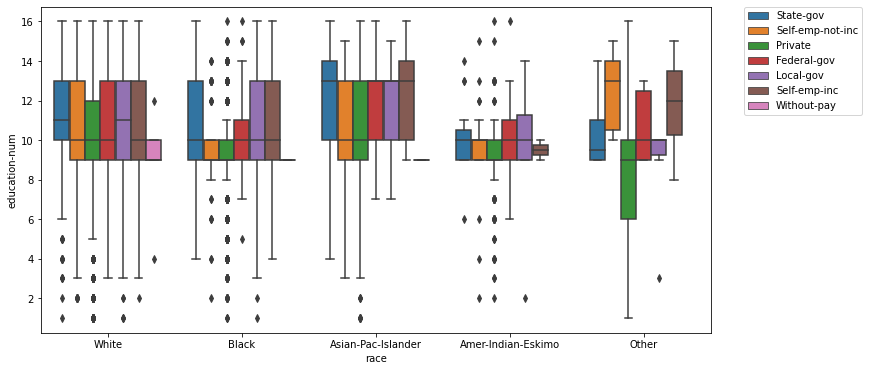

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'race', y = 'education-num', hue = 'workclass')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Without-pay')])

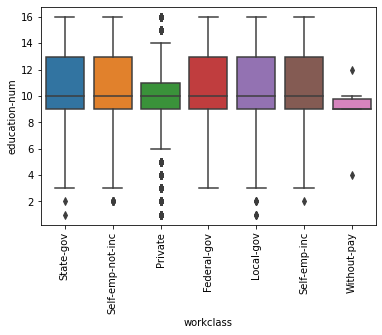

In [35]:
sns.boxplot(x='workclass',y='education-num',data=df)
plt.xticks(rotation=90)

### We need to change categorical values to numeric values. 

In [36]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object' and col != 'income']
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [37]:
df.head(5)

age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          5   77516          0             13               2   
1   50          4   83311          0             13               1   
2   38          2  215646          1              9               0   
3   53          2  234721          5              7               1   
4   28          2  338409          0             13               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours-per-week  native-country income  
0              40               0  <=50K  
1              13               0  <=50K  
2              40               0  <=50K  
3              40               0  <=50K  
4              40               1  <=50K

Now we are ready for split data

In [41]:
#replace_dict = {
    #'>50K':1,
    #'<=50K':0
#}

#df.income.replace(replace_dict, inplace = True)
X = df.drop('income', axis = 1)
y = df.income


# Imbalace Problem

Data imbalance usually reflects an unequal distribution of classes within a dataset. For example, in a income evaluation dataset, most of the income is higher that 50.000dollars. We have very small data for >50K. This leaves us with something like 50:1 ratio between the  >50K and <50K classes.

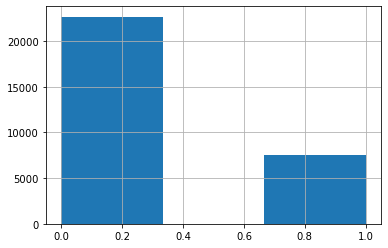

In [44]:
df.income.hist(bins = 3)
plt.show()

In [45]:
# Let's fix this imbalance data with the SMOTE oversampling method
sm = SMOTE(sampling_strategy= 'auto',random_state=0,k_neighbors=5)

X_res, y_res = sm.fit_resample(X,y)

In [46]:
y_res.value_counts()/len(y_res)

income
0    0.5
1    0.5
Name: count, dtype: float64

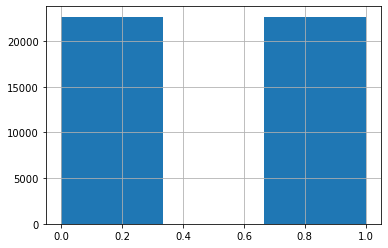

In [47]:
y_res.hist(bins = 3)
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, random_state = 42, test_size = 0.25)

### Scale Data

In [49]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_x_test = scaler.transform(X_test)

# Model

In [50]:
trees = 100
max_features = 3
result = []
model_name = []

model_list = [('DTC',DecisionTreeClassifier()),
             ('RFC', RandomForestClassifier(n_estimators = trees, max_features = 3))]

for name, model in model_list:
    kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
    cv_result = cross_val_score(model, scaled_X_train, y_train, cv = kfold, scoring = 'accuracy')
    result.append(cv_result)
    model_name.append(name)
    res = "{} : {} ({})".format(name, cv_result.mean(), cv_result.std())
    print(res)

DTC : 0.8507989141285712 (0.003968103481230696)
RFC : 0.8875841854258628 (0.004245687062817315)


> #### *It seems like Random Forest has highest accuracy. So, lets choose random forest model and tune params*

#  Random Forest Model Tune

In [51]:
parameters_testing = {
    'n_estimators':[50,100,150],
    'max_features':[3,4,5],
}

model = RandomForestClassifier()

kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
cv_grid = GridSearchCV(estimator = model, param_grid = parameters_testing, cv = kfold, scoring = 'accuracy')
result = cv_grid.fit(scaled_X_train, y_train)

print("Best: {}, using: {}".format(result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
param = result.cv_results_['params']

for mean, stdev, param in zip(means, stds, param):
    print("{}, {} with {}".format(mean, stdev, param))

Best: 0.8885847047421246, using: {'max_features': 3, 'n_estimators': 150}
0.8870544534010193, 0.004115393694505702 with {'max_features': 3, 'n_estimators': 50}
0.8879961578562126, 0.005792591044877337 with {'max_features': 3, 'n_estimators': 100}
0.8885847047421246, 0.00443267323433584 with {'max_features': 3, 'n_estimators': 150}
0.8860832852372708, 0.00582650647206711 with {'max_features': 4, 'n_estimators': 50}
0.8874369534646567, 0.005557393923866731 with {'max_features': 4, 'n_estimators': 100}
0.8877312182494558, 0.004410889080870078 with {'max_features': 4, 'n_estimators': 150}
0.8854652833009606, 0.00490746428675453 with {'max_features': 5, 'n_estimators': 50}
0.8872603616927804, 0.005002078286046873 with {'max_features': 5, 'n_estimators': 100}
0.8869661921477097, 0.0042364255001988375 with {'max_features': 5, 'n_estimators': 150}


>  ### ReTrain with new tuned parameters

In [52]:
tuned_model_ref = RandomForestClassifier(n_estimators = 150, max_features = 3)
tuned_model_ref.fit(scaled_X_train, y_train)
predictions = tuned_model_ref.predict(scaled_x_test)

# Performance

In [53]:
accuracy_score(y_test, predictions)

0.8869073894235013

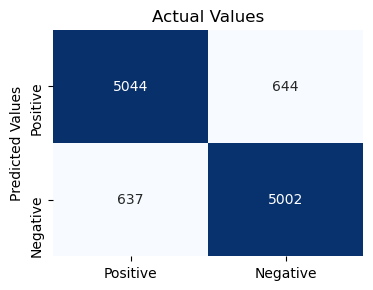

In [54]:
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(4, 3), dpi = 100)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues',cbar = False, 
            xticklabels = ['Positive','Negative'], yticklabels = ['Positive', 'Negative'])
plt.ylabel('Predicted Values')
plt.title('Actual Values')
plt.show()


In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5688
           1       0.89      0.89      0.89      5639

    accuracy                           0.89     11327
   macro avg       0.89      0.89      0.89     11327
weighted avg       0.89      0.89      0.89     11327



### Feature Importance

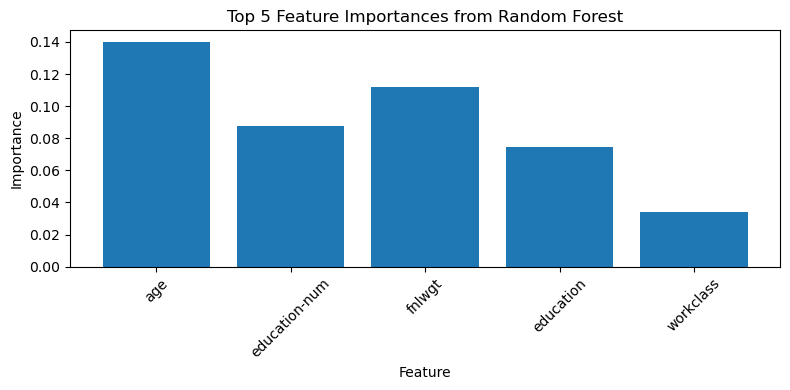

In [56]:
importances = tuned_model_ref.feature_importances_

# Get indices of top 5 features
top5_indices = np.argsort(importances[::-1][:5])
top5_importances = importances[top5_indices]
top5_feature_names = df.columns[top5_indices]

# Plot the feature importances
plt.figure(figsize=(8, 4),dpi = 100)
plt.bar(range(5),top5_importances, tick_label = top5_feature_names )
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Feature Importances from Random Forest')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Evaluating Curves and AUC

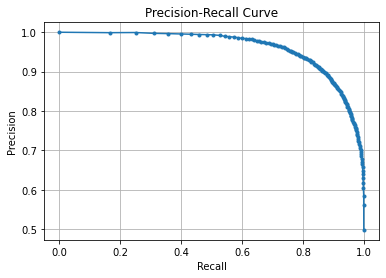

In [57]:
y_scores = tuned_model_ref.predict_proba(scaled_x_test)[:,1]

precision, recall, thresholds  = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


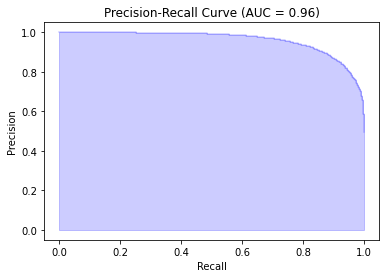

Precision-Recall AUC: 0.96
Average Precision: 0.96


In [58]:
pr_auc = auc(recall, precision)
avg_precision = average_precision_score(y_test, y_scores)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc))
plt.show()

print(f"Precision-Recall AUC: {pr_auc:.2f}")
print(f"Average Precision: {avg_precision:.2f}")